# Linear unit

## Prepare data

Load mnist dataset and convert input images to plain vectors

In [1]:
import numpy as np
np.random.seed(100)
import keras
import tensorflow
import sys
(keras.__version__, tensorflow.__version__, sys.version)

Using TensorFlow backend.


('2.0.2',
 '1.0.1',
 '3.6.0 |Continuum Analytics, Inc.| (default, Dec 23 2016, 12:22:00) \n[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]')

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("shape of X_train =", x_train.shape)
print("shape of y_train =", y_train.shape)

shape of X_train = (60000, 28, 28)
shape of y_train = (60000,)


In [4]:
# Normalize data to values in range 0-1
x_train = x_train/255.0
x_test = x_test/255.0
    
x_train = x_train.reshape([-1,28*28])
x_test = x_test.reshape([-1,28*28])
print("shape(X) =", x_train.shape)

shape(X) = (60000, 784)


Convert **y_train** labels to vectorized one-hot encoding

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
from keras.utils.np_utils import to_categorical
def onehot(x):
    return to_categorical(x)

y_train = onehot(y_train)
y_test = onehot(y_test)
print("shape(y) =", y_train.shape)

shape(y) = (60000, 10)


In [7]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

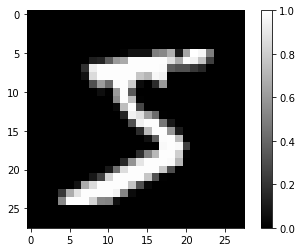

In [8]:
def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="gray")    
    plt.colorbar()
    
plot_image(x_train[0])

## Create model, define objective and optimizer in Keras

In [9]:
import keras.backend as K
import keras.layers as kl
import keras.models as km
import keras.optimizers as ko

The y = W*x + b is represented  

In [10]:
input_img = kl.Input(shape=(784,), name="x")

ln_unit = kl.Dense(units=10, name="W") 

y_pred = ln_unit(input_img)

lm = km.Model(input_img, y_pred)
lm.compile(optimizer=ko.SGD(lr=0.01), loss="mse", metrics=["accuracy"])
lm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 784)               0         
_________________________________________________________________
W (Dense)                    (None, 10)                7850      
Total params: 7,850.0
Trainable params: 7,850.0
Non-trainable params: 0.0
_________________________________________________________________


In [11]:
input_img = kl.Input(shape=(784,), name="x")

y_pred = kl.Dense(units=10, name="W")(input_img)
lm = km.Model(input_img, y_pred)
lm.compile(optimizer=ko.SGD(lr=0.01), loss="mse", metrics=["accuracy"])
lm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 784)               0         
_________________________________________________________________
W (Dense)                    (None, 10)                7850      
Total params: 7,850.0
Trainable params: 7,850.0
Non-trainable params: 0.0
_________________________________________________________________


In [12]:
lm.fit(x=x_train, y=y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test), verbose=1, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 9s - loss: 0.0823 - acc: 0.6283 - val_loss: 0.0585 - val_acc: 0.7788

In [13]:
lm.fit(x=x_train, y=y_train, epochs=4, batch_size=32, validation_data=(x_test, y_test), verbose=2, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
2s - loss: 0.0558 - acc: 0.7833 - val_loss: 0.0515 - val_acc: 0.8135
Epoch 2/4
3s - loss: 0.0510 - acc: 0.8078 - val_loss: 0.0484 - val_acc: 0.8256
Epoch 3/4
2s - loss: 0.0485 - acc: 0.8197 - val_loss: 0.0466 - val_acc: 0.8351
Epoch 4/4
2s - loss: 0.0468 - acc: 0.8268 - val_loss: 0.0453 - val_acc: 0.8386


In [14]:
lm.fit(x=x_train, y=y_train, epochs=2, batch_size=32, validation_data=(x_test, y_test), verbose=2, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
2s - loss: 0.0457 - acc: 0.8322 - val_loss: 0.0444 - val_acc: 0.8460
Epoch 2/2
3s - loss: 0.0448 - acc: 0.8354 - val_loss: 0.0437 - val_acc: 0.8457


## Plot W

In [15]:
lm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 784)               0         
_________________________________________________________________
W (Dense)                    (None, 10)                7850      
Total params: 7,850.0
Trainable params: 7,850.0
Non-trainable params: 0.0
_________________________________________________________________


In [15]:
W_layer = lm.get_layer("W")
W = W_layer.weights[0]
b = W_layer.weights[1]
# W is tf Variable (stored on GPU)
W

Evaluate tf Variables using keras backend API

In [16]:
W_values = K.eval(W)
W_values.shape

(784, 10)

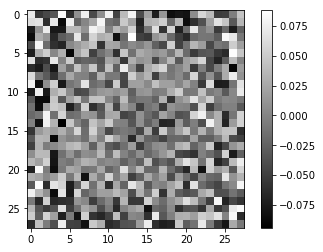

In [17]:
plot_image(W_values[:,0])

In [18]:
y_pred = lm.predict(x_test)

In [19]:
# categorical_accuracy
sum(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))/y_pred.shape[0]

0.84570000000000001

# Single layer NN

Same as above but with nonlinearity 

In [20]:
input_img = kl.Input(shape=(784,), name="x")

y_pred = kl.Dense(units=10, name="W", activation="softmax")(input_img)
nn = km.Model(input_img, y_pred)
nn.compile(optimizer=ko.SGD(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 784)               0         
_________________________________________________________________
W (Dense)                    (None, 10)                7850      
Total params: 7,850.0
Trainable params: 7,850.0
Non-trainable params: 0.0
_________________________________________________________________


In [21]:
nn.fit(x=x_train, y=y_train, epochs=4, batch_size=32, validation_data=(x_test, y_test), verbose=2, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
3s - loss: 0.7842 - acc: 0.8129 - val_loss: 0.4777 - val_acc: 0.8809
Epoch 2/4
3s - loss: 0.4551 - acc: 0.8807 - val_loss: 0.3988 - val_acc: 0.8943
Epoch 3/4
3s - loss: 0.4027 - acc: 0.8915 - val_loss: 0.3663 - val_acc: 0.9023
Epoch 4/4
3s - loss: 0.3766 - acc: 0.8970 - val_loss: 0.3479 - val_acc: 0.9068


In [22]:
nn.fit(x=x_train, y=y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test), verbose=2, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
3s - loss: 0.3599 - acc: 0.9006 - val_loss: 0.3356 - val_acc: 0.9090


In [23]:
W_layer = nn.get_layer("W")
W_values = K.eval(W_layer.weights[0])

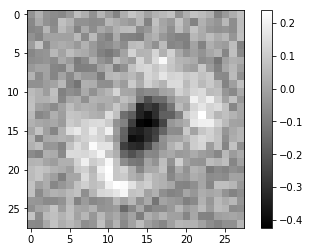

In [24]:
plot_image(W_values[:,0])

## Train with better optimizer

In [35]:
nn.compile(optimizer=ko.Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
nn.fit(x=x_train, y=y_train, epochs=4, batch_size=32, validation_data=(x_test, y_test), verbose=2, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
5s - loss: 0.4647 - acc: 0.8799 - val_loss: 0.3069 - val_acc: 0.9150
Epoch 2/4
5s - loss: 0.3038 - acc: 0.9154 - val_loss: 0.2814 - val_acc: 0.9225
Epoch 3/4
5s - loss: 0.2832 - acc: 0.9203 - val_loss: 0.2817 - val_acc: 0.9224
Epoch 4/4
5s - loss: 0.2732 - acc: 0.9236 - val_loss: 0.2673 - val_acc: 0.9251


In [27]:
nn.fit(x=x_train, y=y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test), verbose=2, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
5s - loss: 0.2634 - acc: 0.9263 - val_loss: 0.2640 - val_acc: 0.9246


# Double layer NN

In [25]:
input_img = kl.Input(shape=(784,), name="x")
h = kl.Dense(units=100, name="W1", activation="relu")(input_img)
y_pred = kl.Dense(units=10, name="W2", activation="softmax")(h)
nn = km.Model(input_img, y_pred)

nn.compile(optimizer=ko.Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 784)               0         
_________________________________________________________________
W1 (Dense)                   (None, 100)               78500     
_________________________________________________________________
W2 (Dense)                   (None, 10)                1010      
Total params: 79,510.0
Trainable params: 79,510.0
Non-trainable params: 0.0
_________________________________________________________________


In [46]:
nn.fit(x=x_train, y=y_train, epochs=4, batch_size=32, validation_data=(x_test, y_test), verbose=2, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
7s - loss: 0.2726 - acc: 0.9228 - val_loss: 0.1490 - val_acc: 0.9551
Epoch 2/4
7s - loss: 0.1197 - acc: 0.9646 - val_loss: 0.1030 - val_acc: 0.9707
Epoch 3/4
7s - loss: 0.0834 - acc: 0.9743 - val_loss: 0.0964 - val_acc: 0.9696
Epoch 4/4
7s - loss: 0.0632 - acc: 0.9801 - val_loss: 0.0855 - val_acc: 0.9756


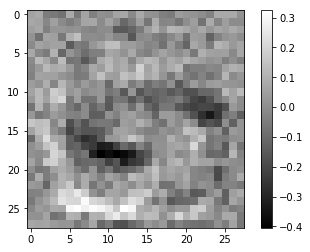

In [31]:
W_layer = nn.get_layer("W1")
W_values = K.eval(W_layer.weights[0])
plot_image(W_values[:,0])

# Activation functions

Trying to use more advanced activation units, however it seems that simple ReLU unit is most
efficient

## Leaky ReLU unit

In [30]:
from keras.layers import LeakyReLU


input_img = kl.Input(shape=(784,), name="x")
h = kl.Dense(units=100, name="W1", activation=LeakyReLU())(input_img)
y_pred = kl.Dense(units=10, name="W2", activation="softmax")(h)
nn = km.Model(input_img, y_pred)

nn.compile(optimizer=ko.Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
nn.fit(x=x_train, y=y_train, epochs=4, batch_size=32, validation_data=(x_test, y_test), verbose=2, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
7s - loss: 0.3041 - acc: 0.9141 - val_loss: 0.1891 - val_acc: 0.9425
Epoch 2/4
7s - loss: 0.1692 - acc: 0.9507 - val_loss: 0.1461 - val_acc: 0.9565
Epoch 3/4
7s - loss: 0.1242 - acc: 0.9637 - val_loss: 0.1284 - val_acc: 0.9622
Epoch 4/4
7s - loss: 0.1001 - acc: 0.9702 - val_loss: 0.1118 - val_acc: 0.9672


## Parametric ReLU

In [29]:
from keras.layers import PReLU


input_img = kl.Input(shape=(784,), name="x")
h = kl.Dense(units=100, name="W1", activation=PReLU())(input_img)
y_pred = kl.Dense(units=10, name="W2", activation="softmax")(h)
nn = km.Model(input_img, y_pred)
nn.compile(optimizer=ko.Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 784)               0         
_________________________________________________________________
W1 (Dense)                   (None, 100)               78500     
_________________________________________________________________
W2 (Dense)                   (None, 10)                1010      
Total params: 79,510.0
Trainable params: 79,510.0
Non-trainable params: 0.0
_________________________________________________________________


In [31]:
nn.fit(x=x_train, y=y_train, epochs=4, batch_size=32, validation_data=(x_test, y_test), verbose=1, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 8s - loss: 0.3116 - acc: 0.9117 - val_loss: 0.2018 - val_acc: 0.9426

# Overfitting

It is a good practive to test if our model can overfit on small data amount 

## Overfitting with one layer NN

In [29]:
# create sample dataset to test overfitting capabilities 
# compare the train accuracy with test 
x_train_sample = x_train[:4096] 
y_train_sample = y_train[:4096] 

In [30]:
input_img = kl.Input(shape=(784,), name="x")
y_pred = kl.Dense(units=10, name="W2", activation="softmax")(input_img)
nn = km.Model(input_img, y_pred)
nn.compile(optimizer=ko.Adam(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
nn.fit(x=x_train_sample, y=y_train_sample, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1, shuffle=True)

Train on 4096 samples, validate on 10000 samples
Epoch 1/10
4096/4096 [==============================] - 0s - loss: 0.5523 - acc: 0.8357 - val_loss: 0.3776 - val_acc: 0.8916
Epoch 2/10
4096/4096 [==============================] - 0s - loss: 0.3080 - acc: 0.9126 - val_loss: 0.3780 - val_acc: 0.8909

Its seems that we are overfitting but the model capacity is not enough to remember all samples.

## Overfitting with three layer NN

In [32]:
input_img = kl.Input(shape=(784,), name="x")
h = kl.Dense(units=100, name="W1", activation="relu")(input_img)
h = kl.Dense(units=100, name="W2", activation="relu")(h)
y_pred = kl.Dense(units=10, name="W3", activation="softmax")(h)
nn = km.Model(input_img, y_pred)

nn.compile(optimizer=ko.Adam(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
nn.fit(x=x_train_sample, y=y_train_sample, epochs=15, batch_size=32, validation_data=(x_test, y_test), verbose=1, shuffle=True)

Train on 4096 samples, validate on 10000 samples
Epoch 1/15
4096/4096 [==============================] - 1s - loss: 0.5482 - acc: 0.8254 - val_loss: 0.3978 - val_acc: 0.8792

In [79]:
nn.compile(optimizer=ko.Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
nn.fit(x=x_train_sample, y=y_train_sample, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1, shuffle=True)

Train on 4096 samples, validate on 10000 samples
Epoch 1/10
4096/4096 [==============================] - 1s - loss: 0.0291 - acc: 0.9932 - val_loss: 0.3719 - val_acc: 0.9387

# Regularization

Add regularization with keras regularizers

In [270]:
from keras import regularizers

input_img = kl.Input(shape=(784,), name="x")
h = kl.Dense(units=100, name="W1", activation="relu", kernel_regularizer=regularizers.l2(l=0.1))(input_img)
y_pred = kl.Dense(units=10, name="W2", activation="softmax", kernel_regularizer=regularizers.l2(l=0.001))(h)
nn = km.Model(input_img, y_pred)
nn.compile(optimizer=ko.Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 784)               0         
_________________________________________________________________
W1 (Dense)                   (None, 100)               78500     
_________________________________________________________________
W2 (Dense)                   (None, 10)                1010      
Total params: 79,510.0
Trainable params: 79,510.0
Non-trainable params: 0.0
_________________________________________________________________


In [287]:
nn.fit(x=x_train_sample, y=y_train_sample, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=1, shuffle=True)

Train on 4096 samples, validate on 10000 samples
Epoch 1/5
4096/4096 [==============================] - 1s - loss: 0.7782 - acc: 0.8875 - val_loss: 0.7775 - val_acc: 0.8857

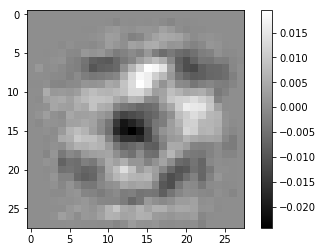

In [290]:
W_layer = nn.get_layer("W1")
W_values = K.eval(W_layer.weights[0])
plot_image(W_values[:,0])

In [295]:
print("sum(|W|)=", np.abs(W_values).sum())

sum(|W|)= 245.174


## L1 Regularization - sparsity check

In [301]:
from keras import regularizers

input_img = kl.Input(shape=(784,), name="x")
h = kl.Dense(units=100, name="W1", activation="relu", kernel_regularizer=regularizers.l1(l=0.0025))(input_img)
y_pred = kl.Dense(units=10, name="W2", activation="softmax", kernel_regularizer=regularizers.l1(l=0.001))(h)
nn = km.Model(input_img, y_pred)
nn.compile(optimizer=ko.Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
nn.fit(x=x_train_sample, y=y_train_sample, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=1, shuffle=True)

Train on 4096 samples, validate on 10000 samples
Epoch 1/5
4096/4096 [==============================] - 2s - loss: 4.3144 - acc: 0.7715 - val_loss: 1.8835 - val_acc: 0.8497

sum(|W|)= 193.026


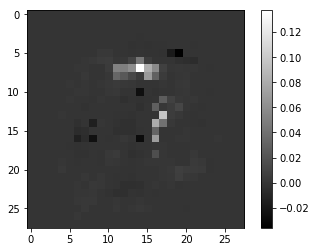

In [304]:
W_layer = nn.get_layer("W1")
W_values = K.eval(W_layer.weights[0])
plot_image(W_values[:,0])
print("sum(|W|)=", np.abs(W_values).sum())

## Dropout

In [43]:
from keras import regularizers

In [42]:


input_img = kl.Input(shape=(784,), name="x")
h      = kl.Dense(units=100, name="W1", activation="relu")(input_img)
h      = kl.Dropout(0.3)(h)
h      = kl.Dense(units=100, name="W2", activation="relu")(h)
h      = kl.Dropout(0.3)(h)
y_pred = kl.Dense(units=10, name="W3", activation="softmax")(h)

nn = km.Model(input_img, y_pred)

nn.compile(optimizer=ko.Adam(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
nn.fit(x=x_train_sample, y=y_train_sample, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=1, shuffle=True)

Train on 4096 samples, validate on 10000 samples
Epoch 1/5
4096/4096 [==============================] - 0s - loss: 0.8128 - acc: 0.7400 - val_loss: 0.3716 - val_acc: 0.8926
Epoch 2/5
4096/4096 [==============================] - 0s - loss: 0.4957 - acc: 0.8525 - val_loss: 0.3312 - val_acc: 0.8980

In [43]:
nn.fit(x=x_train_sample, y=y_train_sample, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=1, shuffle=True)

Train on 4096 samples, validate on 10000 samples
Epoch 1/5
4096/4096 [==============================] - 1s - loss: 0.3494 - acc: 0.8987 - val_loss: 0.4104 - val_acc: 0.8920

The accuracy is smaller in our case but model performs similarly on both data sets, which is a desired result.

# Neural Net "Paradox"

Create Rotation matrix

In [38]:
R = np.diag([1]*28*28)
np.random.shuffle(R)

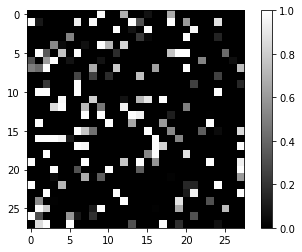

In [39]:
# check the output, 
plot_image(R @ x_train[0])

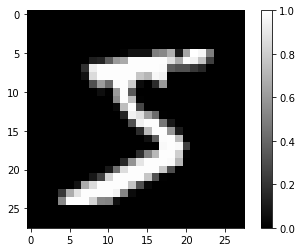

In [40]:
# check reverse operation
plot_image( R.T @ R @ x_train[0])

In [41]:
# we must transpose data because their shapes are not aligned
x_train_shuffled =  (R @ x_train.T).T
x_test_shuffled =  (R @ x_test.T).T

In [42]:
# check shapes
(x_train_shuffled.shape, x_test_shuffled.shape)

((60000, 784), (10000, 784))

In [44]:
# I added the regularization to have nice and smooth filters
input_img = kl.Input(shape=(784,), name="x")
y_pred = kl.Dense(units=10, name="W", activation="softmax", kernel_regularizer=regularizers.l2(0.001))(input_img)
nn = km.Model(input_img, y_pred)

nn.compile(optimizer=ko.Adam(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               (None, 784)               0         
_________________________________________________________________
W (Dense)                    (None, 10)                7850      
Total params: 7,850.0
Trainable params: 7,850.0
Non-trainable params: 0.0
_________________________________________________________________


In [45]:
nn.fit(x=x_train_shuffled, y=y_train, epochs=5, batch_size=32, validation_data=(x_test_shuffled, y_test), verbose=1, shuffle=False)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s - loss: 0.5202 - acc: 0.8787 - val_loss: 0.6609 - val_acc: 0.8484

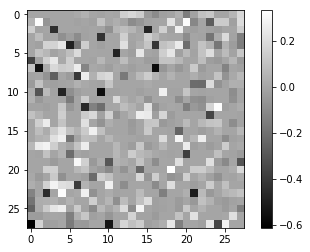

In [46]:
W_layer = nn.get_layer("W")
W_values = K.eval(W_layer.weights[0])
plot_image(W_values[:,0])

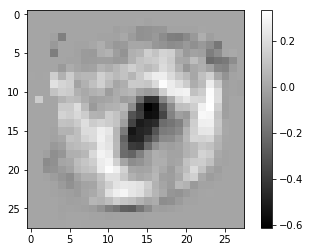

In [47]:
# rotated back
plot_image(W_values[:,0] @ R)

Check model on normal data

In [49]:
# I added the regularization to have nice and smooth filters
nn_normal = km.Model(input_img, y_pred)
nn_normal.compile(optimizer=ko.Adam(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
nn_normal.fit(x=x_train, y=y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=1, shuffle=False)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s - loss: 0.5111 - acc: 0.8840 - val_loss: 0.6582 - val_acc: 0.8491

It looks like we have the same results...